In [2]:
!pip install gdown

In [4]:
!gdown --id 1nBz-jZ5a2YQtQOJLDxbnbQ1pa_eEny0e

/opt/conda/lib/python3.7/site-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1nBz-jZ5a2YQtQOJLDxbnbQ1pa_eEny0e
To: /kaggle/working/jpeg_shape_classes.7z
100%|███████████████████████████████████████| 11.7M/11.7M [00:00<00:00, 189MB/s]


In [5]:
!pip install py7zr

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.0/65.0 kB 526.1 kB/s eta 0:00:00 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 6.0 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.6/138.6 kB 9.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.6/94.6 kB 7.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 357.2/357.2 kB 21.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.3/50.3 kB 3.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 22.2 MB/s eta 0:00:0000:0100:01


In [6]:
from py7zr import unpack_7zarchive
import shutil

shutil.register_unpack_format('7zip', ['.7z'], unpack_7zarchive)
shutil.unpack_archive('./jpeg_shape_classes.7z', '')

# Loading Dataset

In [8]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.resnet import ResNet50
from keras.applications.resnet import preprocess_input
from keras.preprocessing import image
from glob import glob

In [9]:
IMAGE_SIZE = 64

In [10]:
train_path = './jpeg_shape_classes/train'
test_path = './jpeg_shape_classes/test'

In [11]:
from PIL import Image
import os
from IPython.display import display
from IPython.display import Image as _Imgdis

folder = train_path + '/oval/0.jpg'

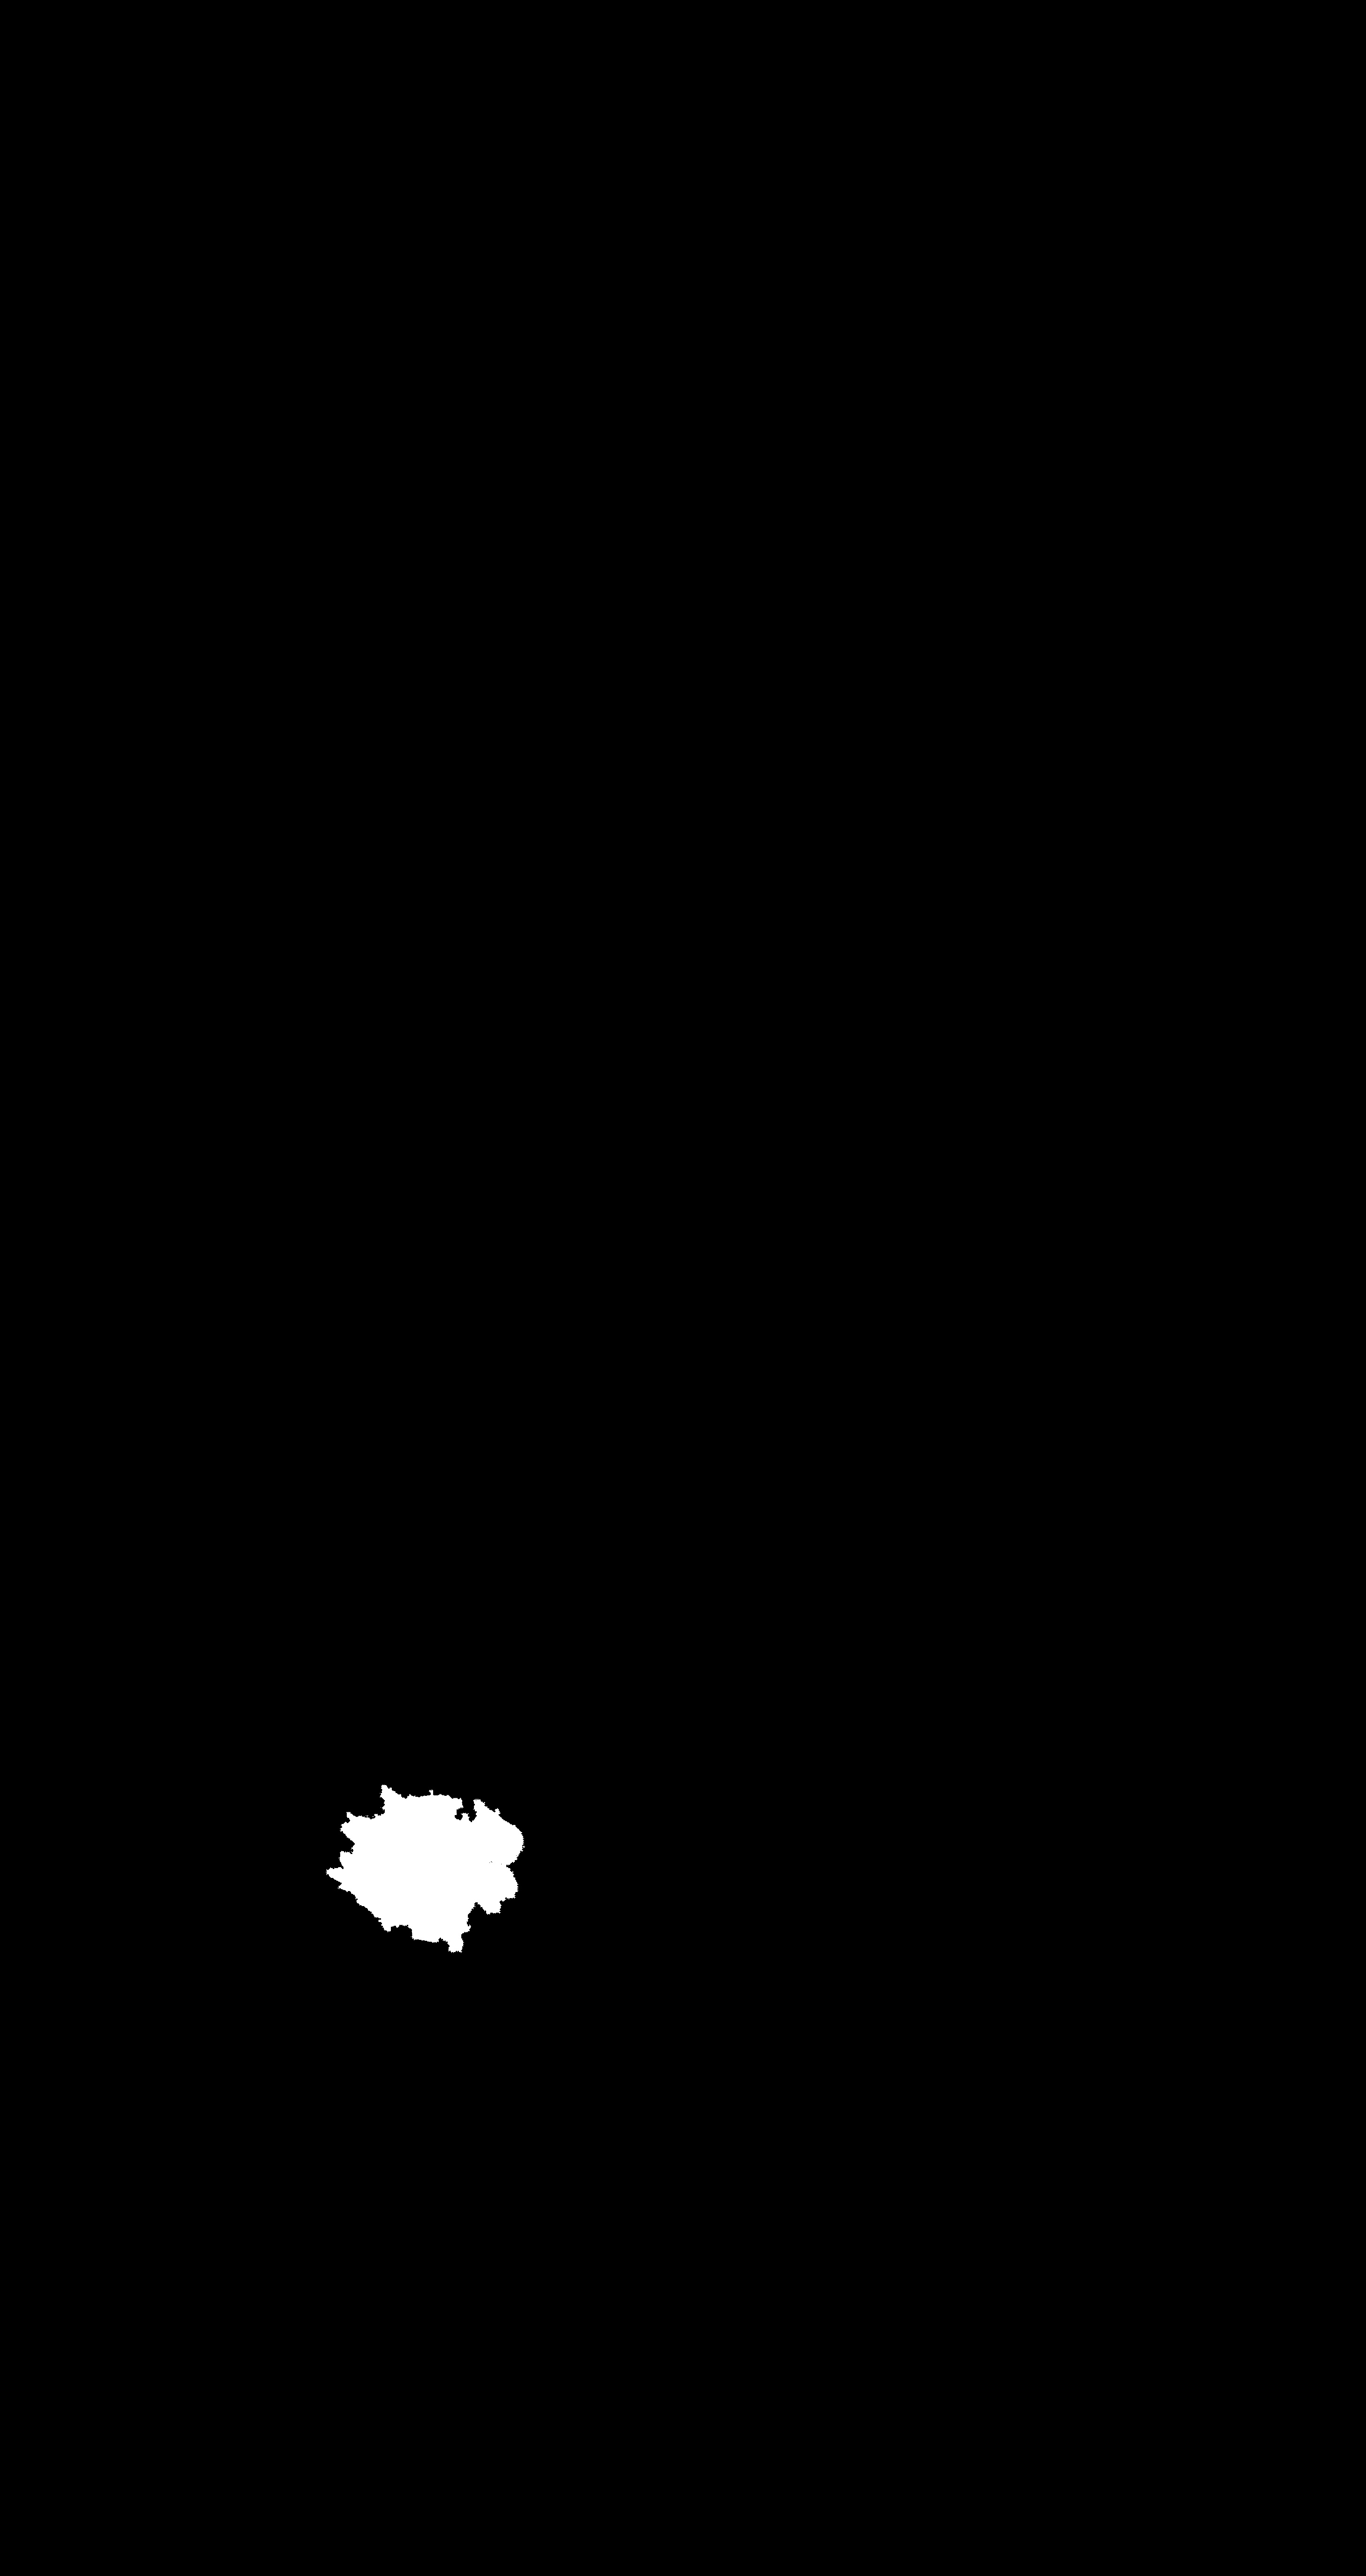

In [12]:
_Imgdis(folder,width=256,height=256)

# Implementing transfer learning

In [14]:
Resnet = ResNet50(input_shape= (IMAGE_SIZE, IMAGE_SIZE, 3), weights='imagenet', include_top= False)

In [15]:
Resnet.input

<KerasTensor: shape=(None, 64, 64, 3) dtype=float32 (created by layer 'input_2')>

In [17]:
for layer in Resnet.layers:
    layer.trainable = False

In [18]:
folders = glob('./jpeg_shape_classes/train/*')
print(len(folders))

4


In [19]:
x = Flatten()(Resnet.output)
prediction = Dense(len(folders), activation= 'softmax')(x)

model = Model(inputs=Resnet.input, outputs = prediction)

model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 64, 64, 3)]  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 70, 70, 3)    0           input_2[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 32, 32, 64)   9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 32, 32, 64)   256         conv1_conv[0][0]                 
______________________________________________________________________________________________

In [20]:
import tensorflow as tf 
from keras import optimizers

adam = tf.optimizers.Adam()

model.compile(loss='categorical_crossentropy', optimizer = adam, metrics = ['accuracy'])

In [21]:
data_gen = image.ImageDataGenerator(preprocessing_function= preprocess_input)

In [22]:
train_set = data_gen.flow_from_directory(train_path, target_size= (64,64), batch_size = 32, class_mode= 'categorical')
test_set = data_gen.flow_from_directory(test_path, target_size= (64,64), batch_size = 32, class_mode= 'categorical')

Found 1145 images belonging to 4 classes.
Found 331 images belonging to 4 classes.


# Training the model

In [23]:
from datetime import datetime
from keras.callbacks import ModelCheckpoint

checkpoint = ModelCheckpoint(filepath='./VGG.h5',verbose=2,save_best_only=True)

callbacks = [checkpoint]

In [24]:
history = model.fit(train_set,epochs=50,callbacks=callbacks,validation_data=test_set)

2022-07-13 05:14:51.106419: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/50


2022-07-13 05:14:57.144632: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


36/36 [==============================] - 78s 2s/step - loss: 1.7165 - accuracy: 0.2856 - val_loss: 1.4759 - val_accuracy: 0.2961

Epoch 00001: val_loss improved from inf to 1.47588, saving model to ./VGG.h5


/opt/conda/lib/python3.7/site-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


Epoch 2/50
36/36 [==============================] - 89s 2s/step - loss: 1.3149 - accuracy: 0.3956 - val_loss: 1.5437 - val_accuracy: 0.3293

Epoch 00002: val_loss did not improve from 1.47588
Epoch 3/50
36/36 [==============================] - 75s 2s/step - loss: 1.2270 - accuracy: 0.4297 - val_loss: 1.6750 - val_accuracy: 0.3082

Epoch 00003: val_loss did not improve from 1.47588
Epoch 4/50
36/36 [==============================] - 66s 2s/step - loss: 1.1426 - accuracy: 0.4725 - val_loss: 1.5987 - val_accuracy: 0.3233

Epoch 00004: val_loss did not improve from 1.47588
Epoch 5/50
36/36 [==============================] - 73s 2s/step - loss: 1.1036 - accuracy: 0.4821 - val_loss: 1.5551 - val_accuracy: 0.3474

Epoch 00005: val_loss did not improve from 1.47588
Epoch 6/50
36/36 [==============================] - 69s 2s/step - loss: 1.0570 - accuracy: 0.5144 - val_loss: 1.5544 - val_accuracy: 0.2991

Epoch 00006: val_loss did not improve from 1.47588
Epoch 7/50
36/36 [======================

In [25]:
import matplotlib.pyplot as plt

In [ ]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.savefig('accuracy_ResNet_pretrain_all_layers.jpg', dpi = 400)
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.savefig('loss_ResNet_pretrain_all_layers.jpg', dpi = 400)

In [27]:
y_test =test_set.labels
y_pred = model.predict(test_set)

In [28]:
y_pred

array([[3.5838779e-02, 9.2537189e-01, 2.7142297e-02, 1.1647007e-02],
       [1.4749971e-04, 9.9983549e-01, 1.3602380e-13, 1.6934253e-05],
       [3.3538911e-01, 1.1104257e-01, 4.6941882e-01, 8.4149510e-02],
       ...,
       [2.9230490e-01, 1.5576051e-01, 5.3476673e-01, 1.7167863e-02],
       [2.8023419e-01, 2.3412041e-01, 4.8377451e-02, 4.3726805e-01],
       [8.0826473e-01, 1.4698827e-02, 1.6196996e-01, 1.5066532e-02]],
      dtype=float32)

In [29]:
import numpy as np

In [30]:
y_pred_proccessed = []
for i in y_pred:
    index_max = np.argmax(i)
    y_pred_proccessed.append(index_max)

y_pred_proccessed = np.array(y_pred_proccessed, dtype= np.float32)

In [31]:
import sklearn.metrics as metrics

In [32]:
matrix = metrics.confusion_matrix(y_test, y_pred_proccessed)

In [34]:
import seaborn as sn
import pandas as pd

In [35]:
df_cm = pd.DataFrame(matrix, index = [i for i in ['round', 'oval', 'lobulated', 'irregular']],
                  columns = [i for i in ['round', 'oval', 'lobulated', 'irregular']])

In [ ]:
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True, cmap='BuPu')
plt.savefig('confmatrix_ResNet_pretrain_all_layers.jpg',dpi=400)